In [1]:
#Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Reading and displying the dataset
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
# Returns total sum of total null values in each column
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# Returns statistics on numeric values of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [6]:
# Renaming the columns with appropriate names

df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance_of_Admit'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Removing the serial no column from dataset

df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Visualization

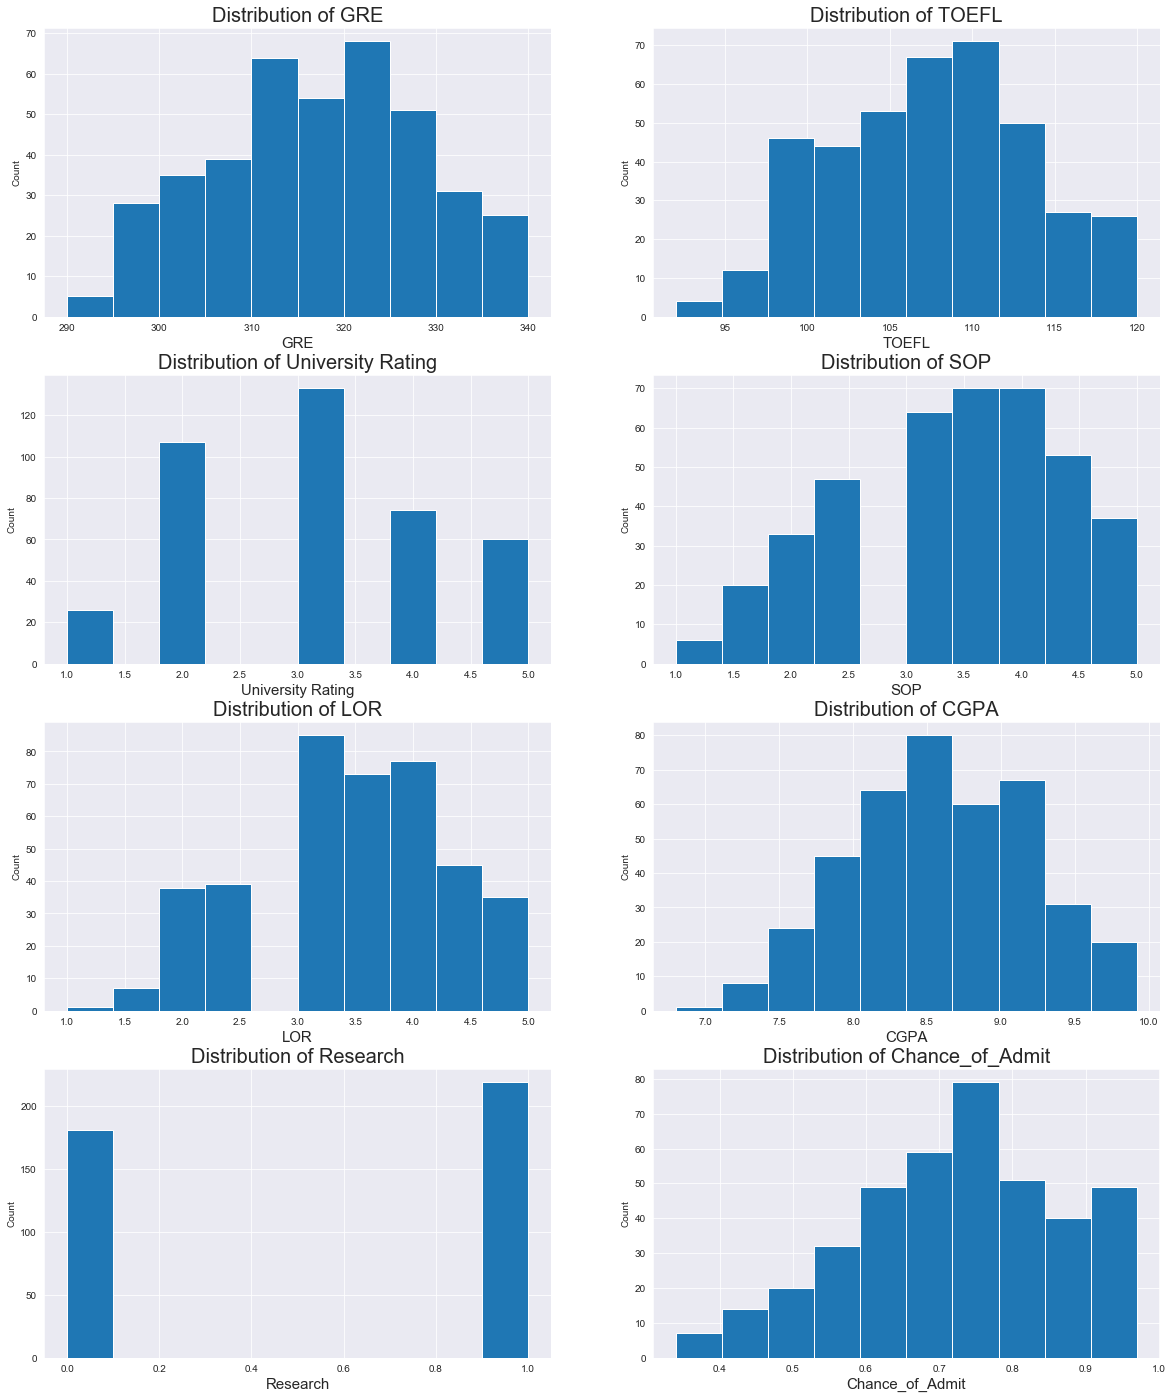

In [9]:
# Visualizing the feature by using matplotlib hist function
nrows=len(df.columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,50))

for column in df.columns:
    plt.subplot(nrows,ncolumns,subCnt)
    plt.hist(df[column])
    plt.title("Distribution of "+column, fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Count')
    subCnt = subCnt + 1

plt.show()

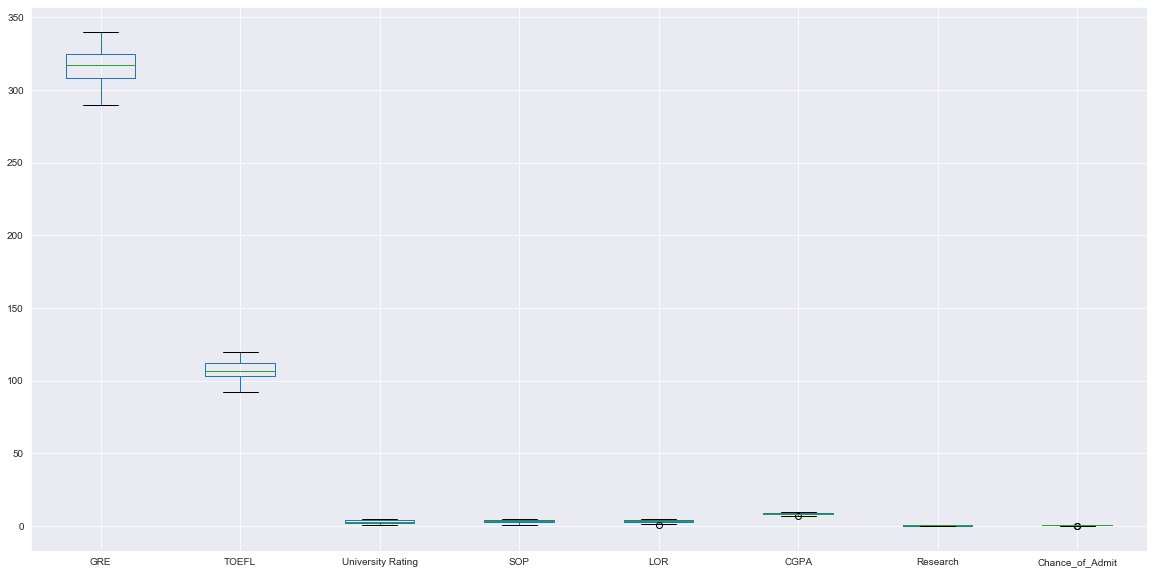

In [10]:
# Visualizing the feature by Boxplot
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

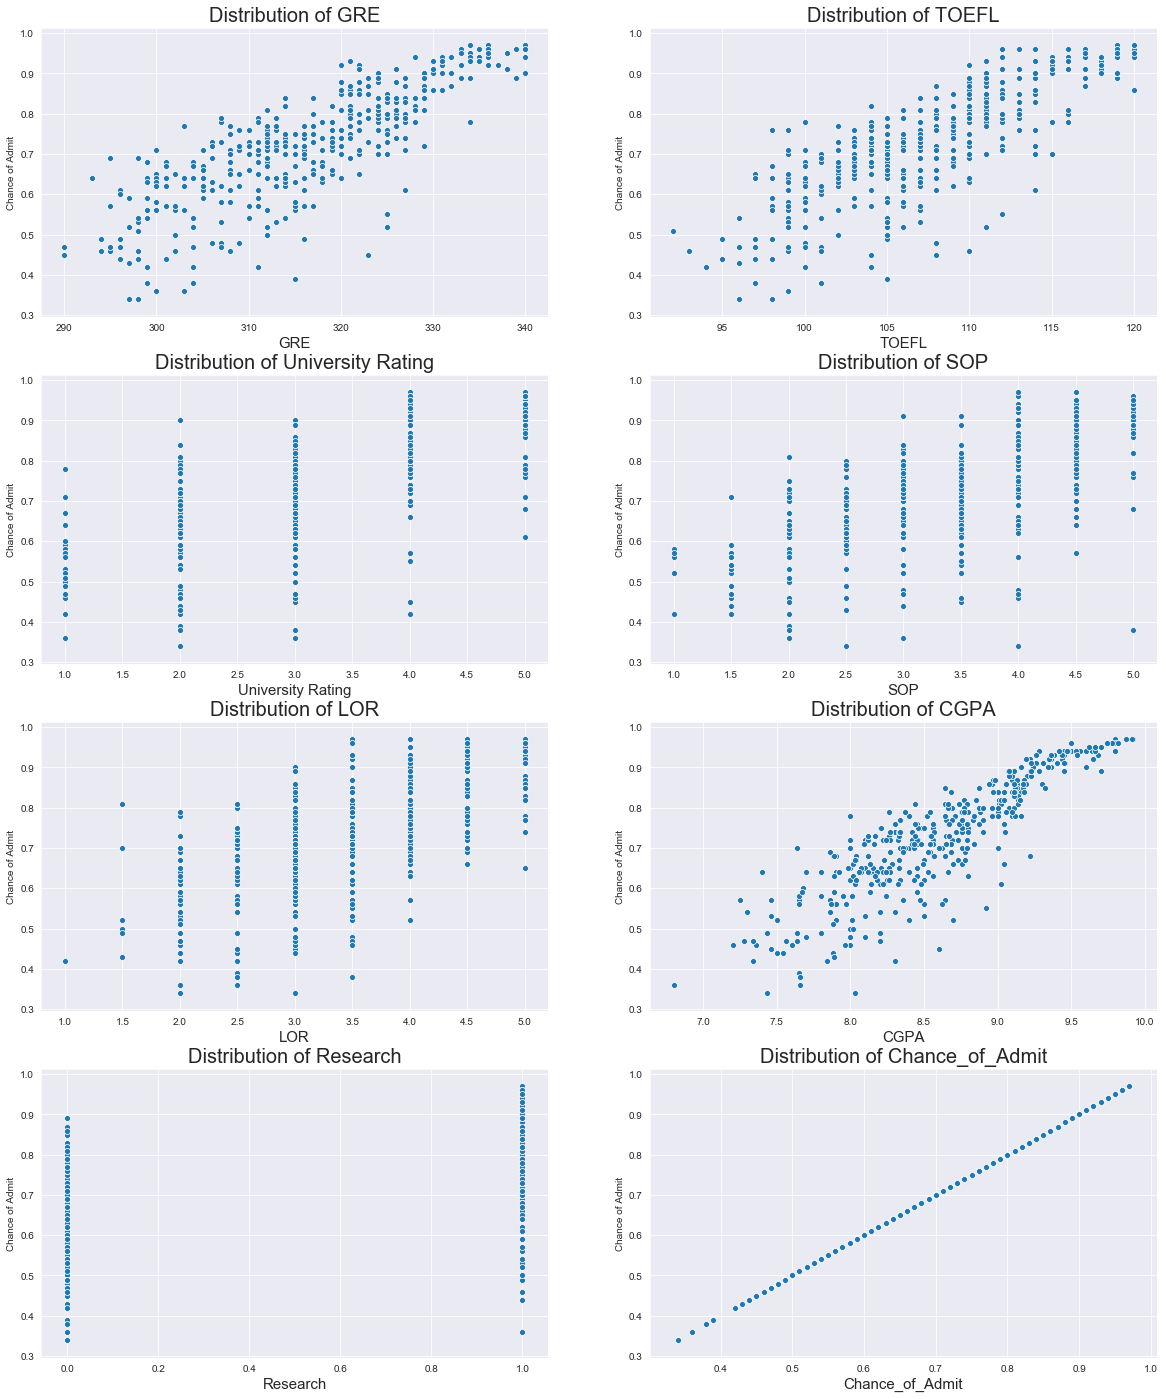

In [11]:
# Visualizing the feature by using Seaborn scatterplot function

nrows=len(df.columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,50))

for column in df.columns:
    plt.subplot(nrows,ncolumns,subCnt)
    sns.scatterplot(x = column, y = df.Chance_of_Admit,data = df)
    plt.title("Distribution of "+column, fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel("Chance of Admit")
    subCnt = subCnt + 1

plt.show()

In [12]:
# Returning weither dataset contains any 0 values.
anyzero = df.eq(0).any()
anyzero

GRE                  False
TOEFL                False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research              True
Chance_of_Admit      False
dtype: bool

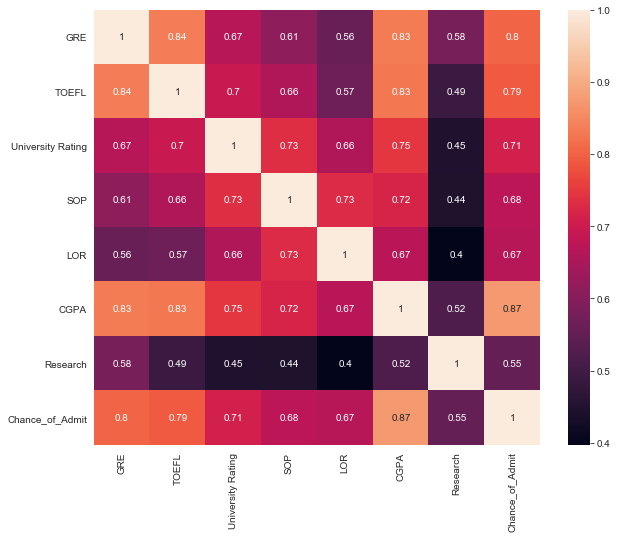

In [13]:
# Visualizing the correlation of different attributer
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building

In [14]:
# Splitting the dataset into independent and dependent values
X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']

In [15]:

def best_model(X,y):
    models={
        'linear_regression': { 
        'model' : LinearRegression(),
        'parameters' : {
            'normalize': [True,False]
            }
        },
            'ridge_regression': { 
        'model' : Ridge(),
        'parameters' : {
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'normalize': [True,False],
            'alpha': [0.001,0.1,1,5,10,100]
            }
        },
            'lasso_regression': { 
        'model' : Lasso(),
        'parameters' : {
            'normalize': [True,False],
            'alpha': [1,2,5,10,100],
            'selection': ['random', 'cyclic']
            }
        },
            'randomforest_regression': { 
        'model' : RandomForestRegressor(),
        'parameters' : {
            'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
            'max_features':  ['auto', 'sqrt'],
            'max_depth':  [int(x) for x in np.linspace(5, 30, num = 6)],
            'min_samples_split': [2, 5, 10, 15, 100],
            'min_samples_leaf': [1, 2, 5, 10]
            }
        },
            'decisiontree_regression': { 
        'model' : DecisionTreeRegressor(),
        'parameters' : {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random'],
            'max_features':  ['auto', 'sqrt'],
            'max_depth':  [int(x) for x in np.linspace(5, 30, num = 6)],
            'min_samples_split': [2, 5, 10, 15, 100],
            'min_samples_leaf': [1, 2, 5, 10]
            }
        }
           
           
    }
    
    scores=[]
    for model_name, model_parameters in models.items():
        rd_cv=RandomizedSearchCV(model_parameters['model'], model_parameters['parameters'], 
                                 cv=5, random_state=5, n_jobs=1)
        rd_cv.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': rd_cv.best_params_,
            'score': rd_cv.best_score_
        })
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

In [16]:
best_model(X, y)

,model,best_parameters,score
0,linear_regression,{'normalize': True},0.771179
1,ridge_regression,"{'solver': 'lsqr', 'normalize': False, 'alpha'...",0.771323
2,lasso_regression,"{'selection': 'random', 'normalize': False, 'a...",0.212083
3,randomforest_regression,"{'n_estimators': 1000, 'min_samples_split': 15...",0.759342
4,decisiontree_regression,"{'splitter': 'best', 'min_samples_split': 2, '...",0.726353


In [17]:
# Splitting the dataset into train and test samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print('Train data shape:',X_train.shape,y_train.shape)
print('Test data shape:',X_test.shape,y_test.shape)

Train data shape: (320, 7) (320,)
Test data shape: (80, 7) (80,)


### Since the Linear Regression algorithm has the highest score, we will select Linear Regression as our model.

In [18]:
# Creating Linear Regression Model
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7571471505242839

### Predicting the model y using train values

In [19]:
# Example 1
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[307, 112, 2, 3.5, 2.5, 9.22, 0]])[0]*100, 3)))

Chance of getting into UCLA is 75.988%


In [20]:
# Example 2
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[310, 113, 2, 3.0, 2.5, 9.72, 1]])[0]*100, 3)))

Chance of getting into UCLA is 84.53%
